In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Get data
precipitation = pd.read_csv('monthwise_datasets/Monthwise_Precipitation.csv')
sunspot = pd.read_csv('monthwise_datasets/Monthwise_Sunspot.csv')

sunspot['Date']= pd.to_datetime(sunspot['Date'])
precipitation['Date']= pd.to_datetime(precipitation['Date'])


In [3]:
# Clipping data to our needs
sunspot.set_index('Date', inplace=True)
precipitation.set_index('Date', inplace=True)

In [4]:
# Precipitation is from Jan, 1951 till Dec, 2016
# Hence, we clip the sunspot data for that range
sunspot = sunspot['1951-01-01': '2016-12-31']

In [19]:
sunspot['year'] = pd.DatetimeIndex(sunspot.index).year
precipitation['year'] = pd.DatetimeIndex(precipitation.index).year

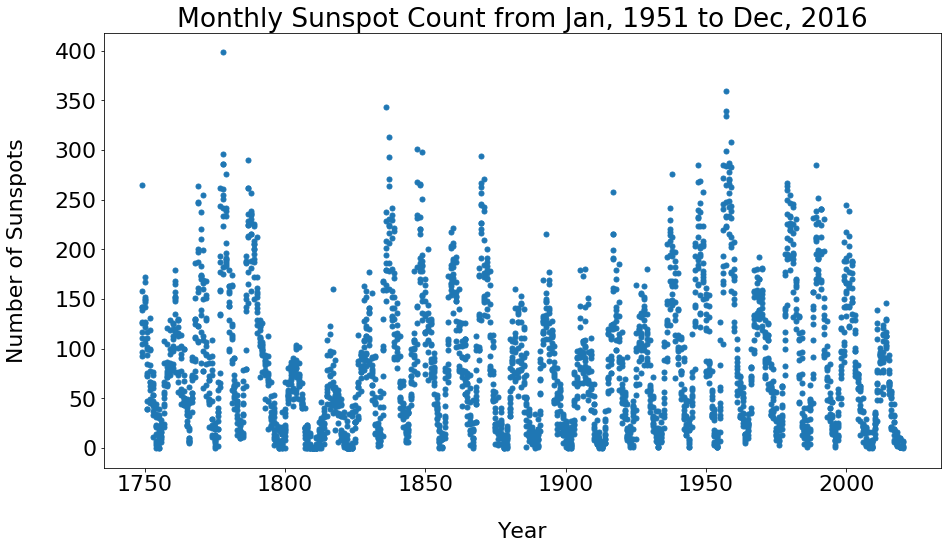

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(sunspot['year'],sunspot['Sunspot'], s=25)
plt.xlabel('\nYear')
plt.ylabel('Number of Sunspots\n')
plt.title('Monthly Sunspot Count from Jan, 1951 to Dec, 2016')
plt.show()

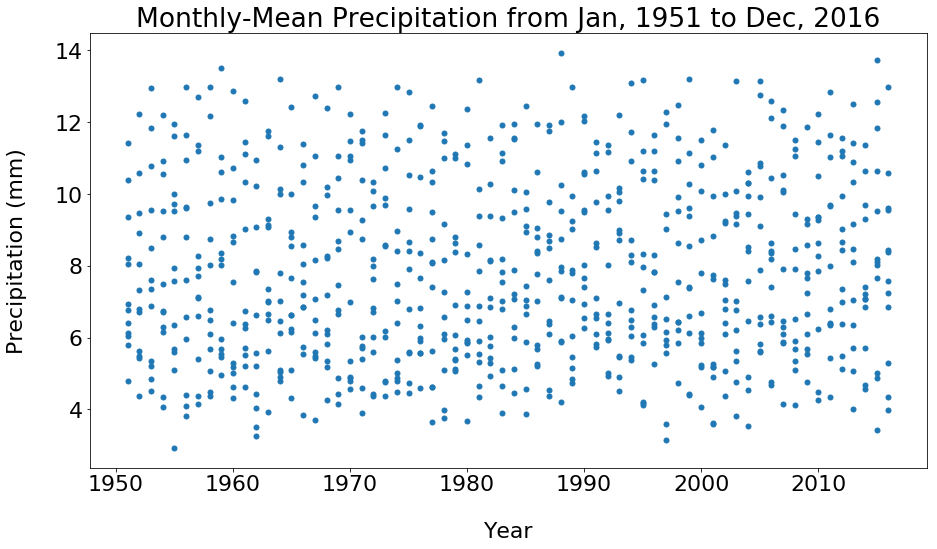

In [26]:
plt.figure(figsize=(15,8))
plt.scatter(precipitation['year'],precipitation['Precipitation'], s=25)
plt.xlabel('\nYear')
plt.ylabel('Precipitation (mm)\n')
plt.title('Monthly-Mean Precipitation from Jan, 1951 to Dec, 2016')
plt.show()

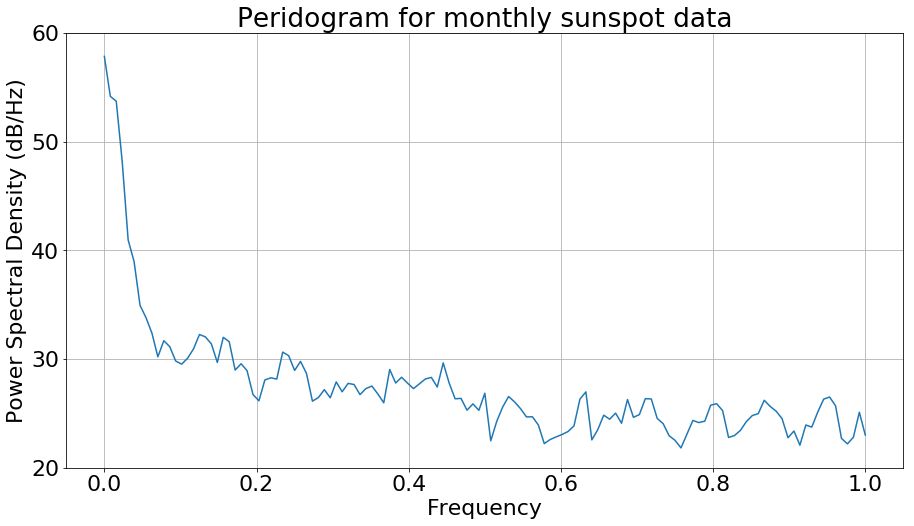

In [33]:
plt.figure(figsize=(15,8))
plt.psd(sunspot['Sunspot'])
plt.title('Peridogram for monthly sunspot data')
plt.show()

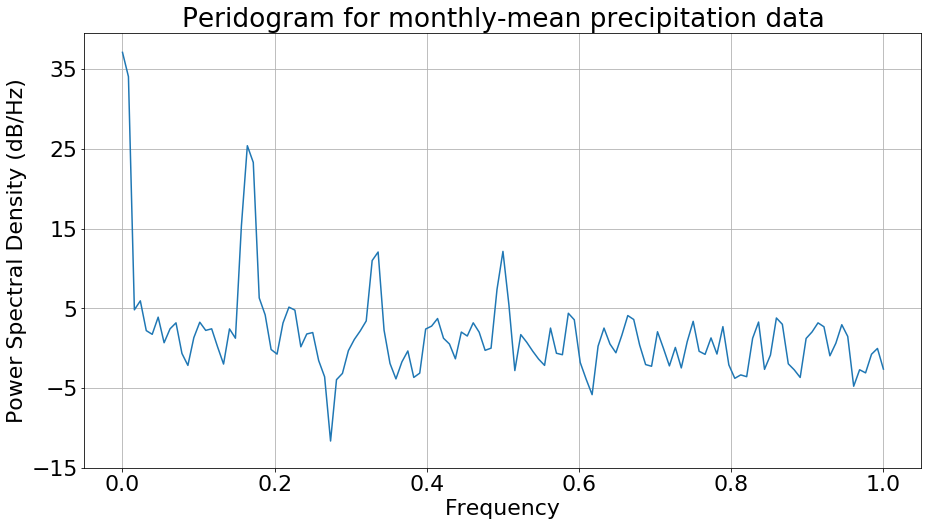

In [32]:
plt.figure(figsize=(15,8))
plt.psd(precipitation['Precipitation'])
plt.title('Peridogram for monthly-mean precipitation data')
plt.show()

In [41]:
# Monthwise correlation
df = (df.resample('m')
        .unstack(fill_value=0))

df = df.reindex(columns=pd.date_range('2018-01-01', df.columns.max(), freq='m'), fill_value=0)
df.columns = df.columns.strftime('%b_%y')

,Sunspot
Date,
1951-01-01,85.0
1951-02-01,84.8
1951-03-01,79.3
1951-04-01,131.7
1951-05-01,153.7
1951-06-01,142.4
1951-07-01,87.2
1951-08-01,86.5
1951-09-01,117.7


# Correlation

In [5]:
sunspot['month'] = pd.DatetimeIndex(sunspot.index).month

sunspot_new = pd.DataFrame()
for i in sunspot.groupby('month'):
    sunspot_new[i[0]] = pd.Series(list(i[1]['Sunspot']))
    
sunspot_new.columns = ['Jan_S', 'Feb_S', 'Mar_S', 'Apr_S', 'May_S', 'Jun_S', 'Jul_S','Aug_S', 'Sep_S', 'Oct_S', 'Nov_S', 'Dec_S']



In [6]:
precipitation['month'] = pd.DatetimeIndex(precipitation.index).month

precipitation_new = pd.DataFrame()
for i in precipitation.groupby('month'):
    precipitation_new[i[0]] = pd.Series(list(i[1]['Precipitation']))
    
precipitation_new.columns = ['Jan_P', 'Feb_P', 'Mar_P', 'Apr_P', 'May_P', 'Jun_P', 'Jul_P','Aug_P', 'Sep_P', 'Oct_P', 'Nov_P', 'Dec_P']

In [7]:
result = pd.concat([sunspot_new, precipitation_new], axis=1).corr()
corr_mat = result[sunspot_new.columns].ix[precipitation_new.columns]

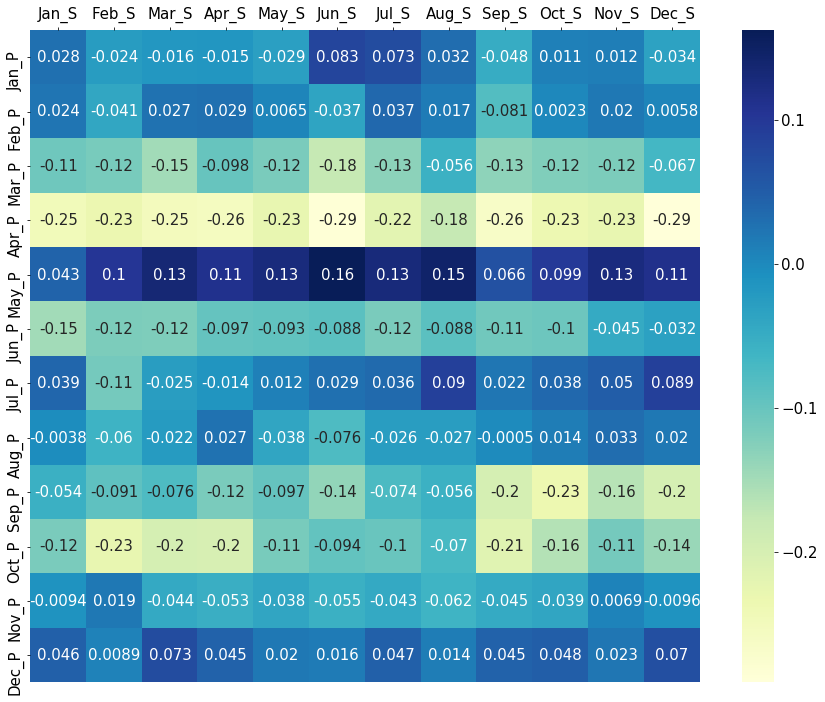

In [19]:
matplotlib.rcParams.update({'font.size': 15})

f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

# P-Values

In [42]:
inter_result = result.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(result.columns)) 
p_mat = inter_result[sunspot_new.columns].ix[precipitation_new.columns]

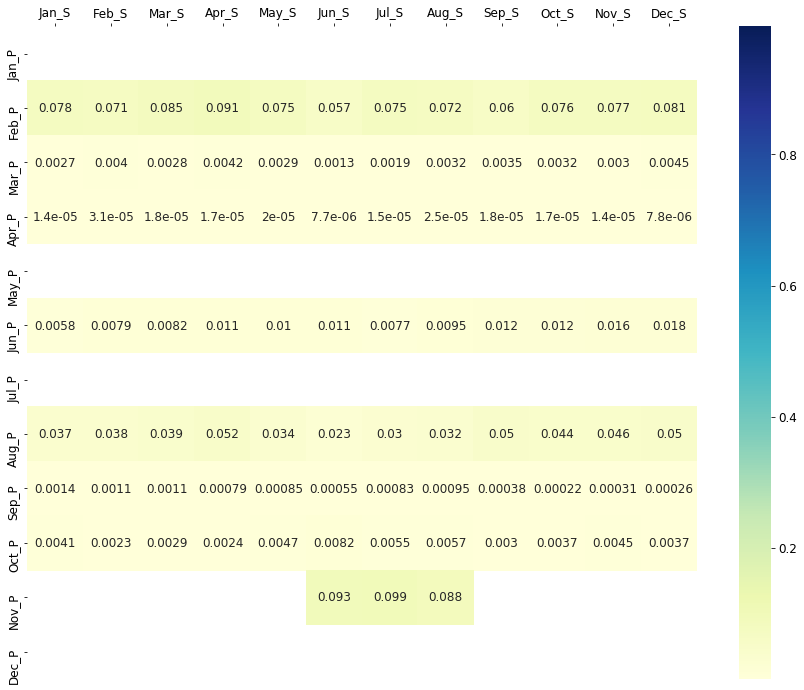

In [41]:
matplotlib.rcParams.update({'font.size': 12})

f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(p_mat, mask=p_mat > 0.1 ,annot=True, cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')